In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Source:  
https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)   

#### Data Set Information:  
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. A few of the images can be found at [Web Link]  

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree. Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.  

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].  

This database is also available through the UW CS ftp server:  
ftp ftp.cs.wisc.edu  
cd math-prog/cpo-dataset/machine-learn/WDBC/  

#### Attribute Information:    
####  Attribute                                      Domain    
-- -----------------------------------------   
1. Sample code number            id number  
2. Clump Thickness               1 - 10  
3. Uniformity of Cell Size       1 - 10  
4. Uniformity of Cell Shape      1 - 10  
5. Marginal Adhesion             1 - 10  
6. Single Epithelial Cell Size   1 - 10  
7. Bare Nuclei                   1 - 10  
8. Bland Chromatin               1 - 10  
9. Normal Nucleoli               1 - 10  
10. Mitoses                      1 - 10  
11. Class:                       (2 for benign, 4 for malignant)  

In [2]:
dataset_name = 'breast-cancer-wisconsin'

In [3]:
file_path = '~/data/breast-cancer-wi-diag/'
file_name = 'breast-cancer-wisconsin.data'
file = file_path + file_name
df = pd.read_csv(file, names=['sample_code_number', 'clump_thickness', 'uniformity_of_cell_size', 
                              'uniformity_of_cell_shape', 'marginal_adhesion', 'single_epithelial_cell_size', 
                              'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitosis', 'class'])
df.shape

(699, 11)

In [4]:
# drop sample_code_number, not needed
df = df.drop(columns='sample_code_number')

# drop nan data  
df[df == "?"] = np.nan
df = df.dropna(how='any')

# convert bare_nuclei to numeric
df['bare_nuclei'] = pd.to_numeric(df['bare_nuclei'])
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 10 columns):
clump_thickness                683 non-null int64
uniformity_of_cell_size        683 non-null int64
uniformity_of_cell_shape       683 non-null int64
marginal_adhesion              683 non-null int64
single_epithelial_cell_size    683 non-null int64
bare_nuclei                    683 non-null int64
bland_chromatin                683 non-null int64
normal_nucleoli                683 non-null int64
mitosis                        683 non-null int64
class                          683 non-null int64
dtypes: int64(10)
memory usage: 58.7 KB


(683, 10)

In [8]:
# add a class label based on the class value (to make labeling plots easier)
df['class_label'] = np.where(df['class']>2, 'malignant', 'benign')

In [9]:
# get the feature names to make plotting easier
feature_names = list(df.columns.values)
feature_names.remove('class')
feature_names.remove('class_label')

In [10]:
df.head()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class,class_label
0,5,1,1,1,2,1,3,1,1,2,benign
1,5,4,4,5,7,10,3,2,1,2,benign
2,3,1,1,1,2,2,3,1,1,2,benign
3,6,8,8,1,3,4,3,7,1,2,benign
4,4,1,1,3,2,1,3,1,1,2,benign


In [11]:
df.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
# check dataframe for bad data
df.isnull().any() | df.isna().any()

clump_thickness                False
uniformity_of_cell_size        False
uniformity_of_cell_shape       False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitosis                        False
class                          False
class_label                    False
dtype: bool

In [13]:
(df.isnull() | df.isna()).sum()

clump_thickness                0
uniformity_of_cell_size        0
uniformity_of_cell_shape       0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitosis                        0
class                          0
class_label                    0
dtype: int64

Benign:    444
Malignant:  239


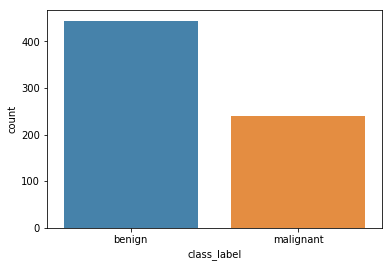

In [14]:
# get the number of samples for each class
num_benign = df[df['class'] == 2].shape[0]
num_malignant = df[df['class'] == 4].shape[0]

print('Benign:   ',num_benign)
print('Malignant: ', num_malignant)

sns_plot = sns.countplot(x='class_label', data=df, alpha=.9)
plt.savefig(dataset_name + '_countplot.png')
plt.show()

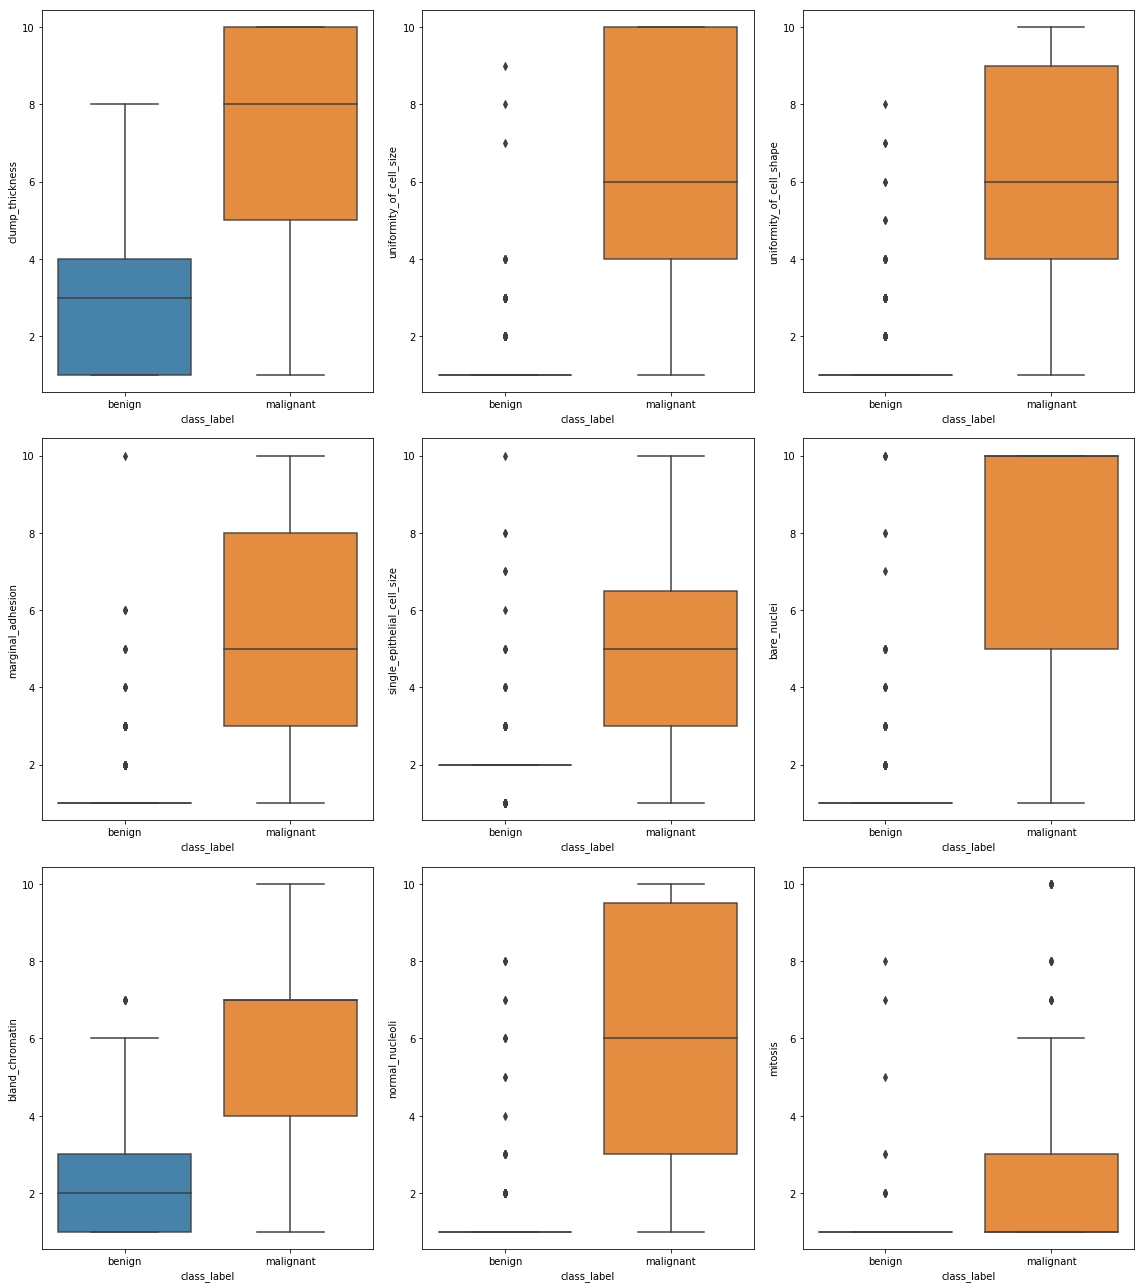

In [16]:
num_plots = len(feature_names)
num_columns = 3
num_rows = math.ceil(num_plots/num_columns) # round up
x_label = 'class_label'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(16, 18))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.boxplot(x=x_label, y=name, data=df, ax=axs[index], boxprops=dict(alpha=.9))
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.boxplot(x=x_label, y=name, data=df, ax=axs[row][col], boxprops=dict(alpha=.9))
plt.tight_layout()
plt.savefig(dataset_name + '_boxplots.png')  
plt.show()

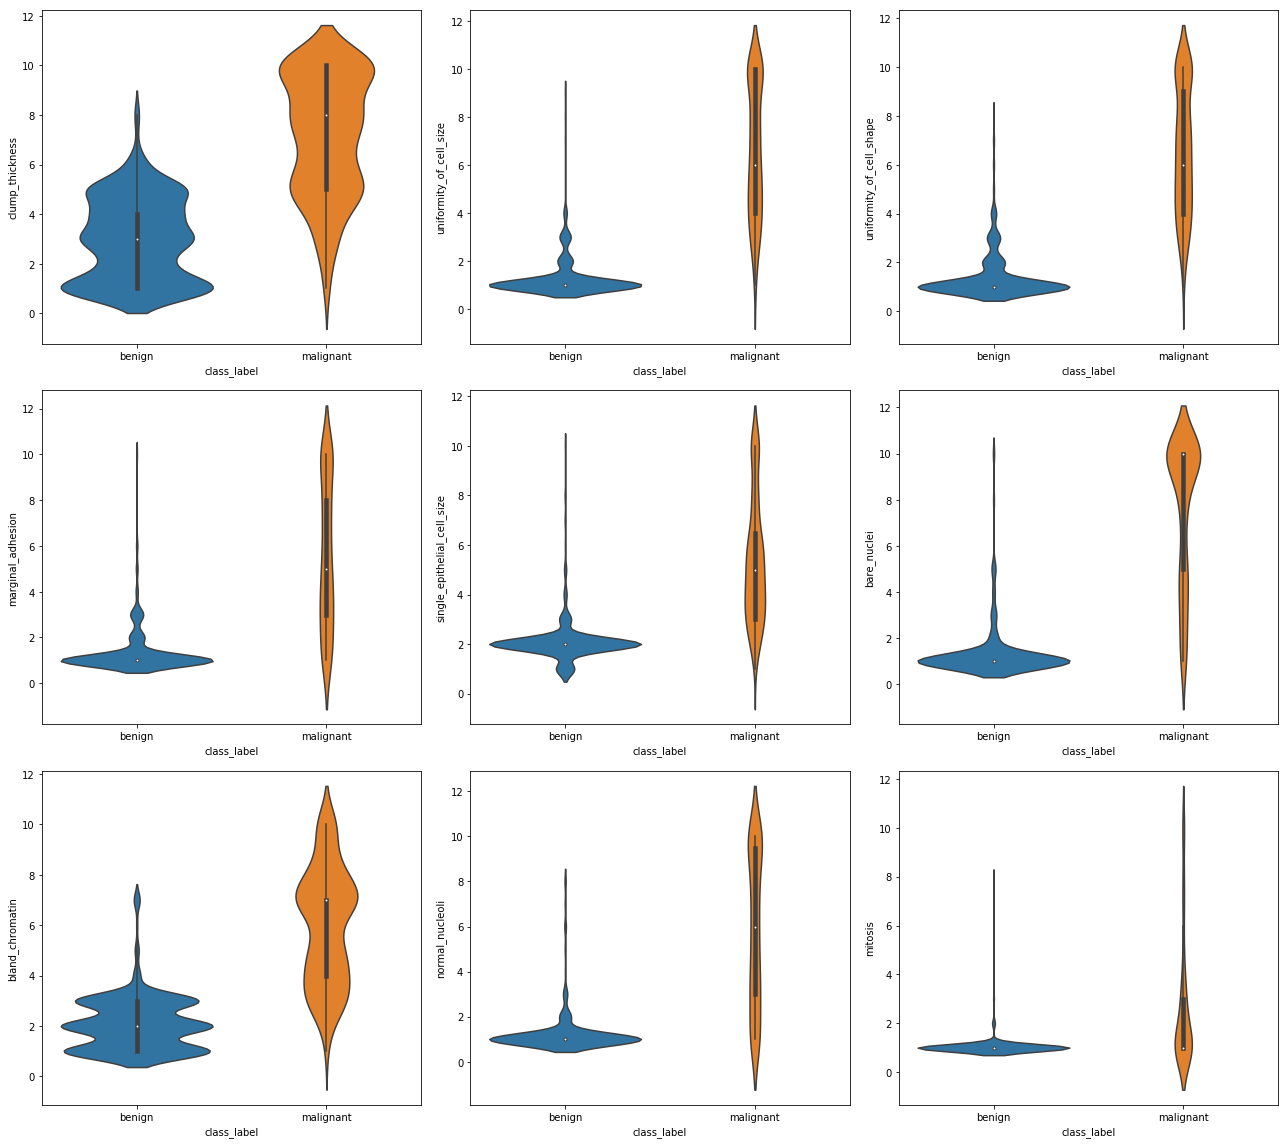

In [17]:
num_plots = len(feature_names)
num_columns = 3
num_rows = math.ceil(num_plots/num_columns) # round up
x_label = 'class_label'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,16))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.violinplot(x=x_label, y=name, data=df, ax=axs[index])
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.violinplot(x=x_label, y=name, data=df, ax=axs[row][col])
plt.tight_layout()
plt.savefig(dataset_name + '_violinplots.png')  
plt.show()

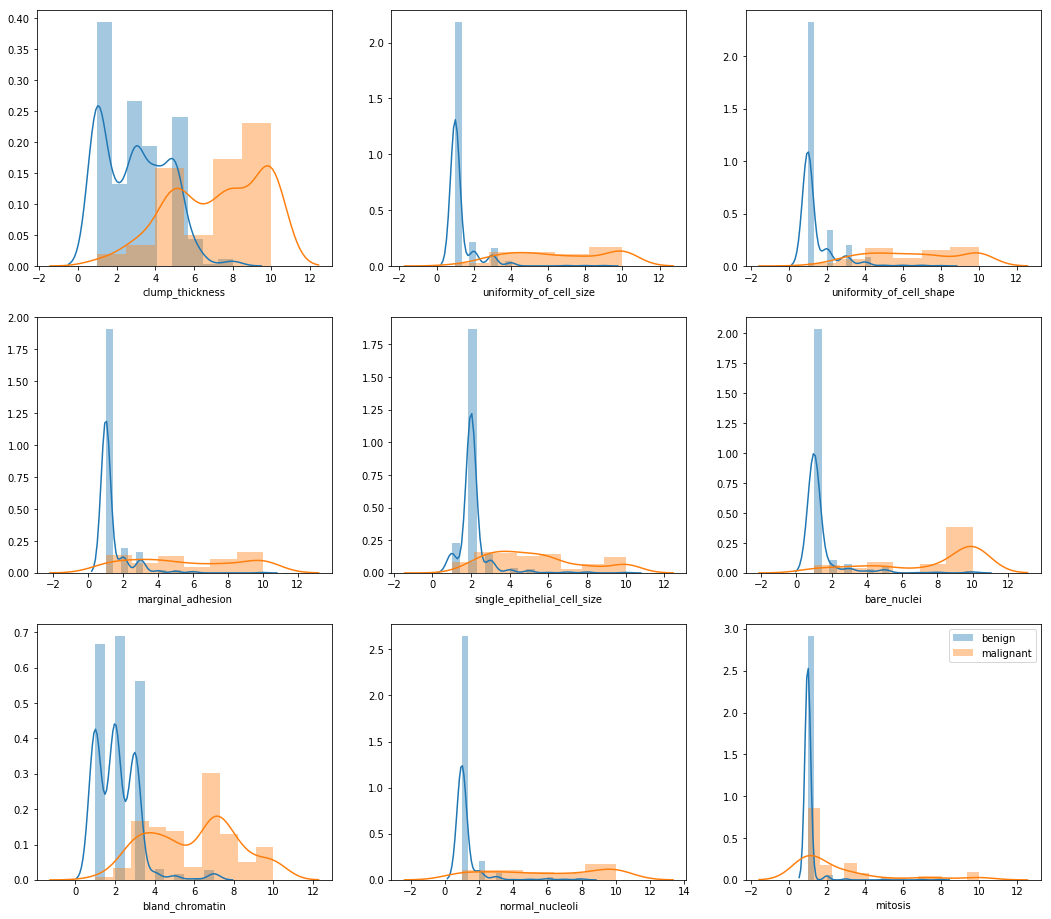

In [18]:
num_plots = len(feature_names)
num_columns = 3
num_rows = int(num_plots/num_columns + num_plots%num_columns) # round up
label = 'class'

fig, axs = plt.subplots(nrows=num_rows, ncols=num_columns, figsize=(18,16))

if num_rows == 1:
    for index, name in enumerate(feature_names):
        sns.distplot(df[df[label]==2][name], ax=axs[index])
        sns.distplot(df[df[label]==4][name], ax=axs[index])
else:
    for index, name in enumerate(feature_names):
        row = int(index / num_columns)
        col = index % num_columns
        sns.distplot(df[df[label]==2][name], ax=axs[row][col])
        sns.distplot(df[df[label]==4][name], ax=axs[row][col])
plt.legend(['benign','malignant'])
plt.savefig(dataset_name + '_distplots_by_class.png')  
plt.show()

In [19]:
# compute pairwise correlation of the attributes
corr = df.corr()
corr

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitosis,class
clump_thickness,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
uniformity_of_cell_size,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
uniformity_of_cell_shape,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
marginal_adhesion,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
single_epithelial_cell_size,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
bare_nuclei,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
bland_chromatin,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
normal_nucleoli,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
mitosis,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448
class,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448,1.000000


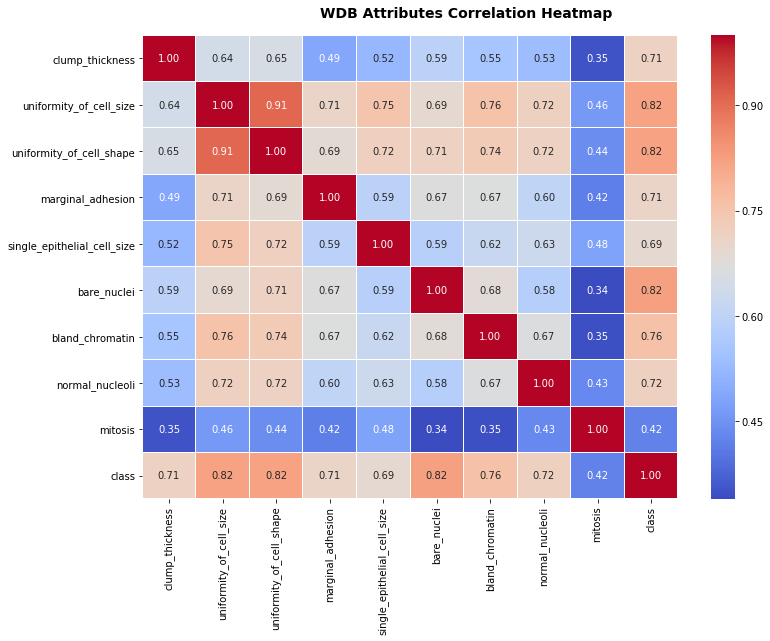

In [20]:
fig, (ax) = plt.subplots(1, 1, figsize=(12,8))

hm = sns.heatmap(corr, 
                 ax=ax,           # Axes in which to draw the plot, otherwise use the currently-active Axes.
                 cmap="coolwarm", # Color Map.
                 #square=True,    # If True, set the Axes aspect to “equal” so each cell will be square-shaped.
                 annot=True, 
                 fmt='.2f',       # String formatting code to use when adding annotations.
                 #annot_kws={"size": 14},
                 linewidths=.05)

fig.subplots_adjust(top=0.93)
fig.suptitle('WDB Attributes Correlation Heatmap', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_heatmap.png') 
plt.show()

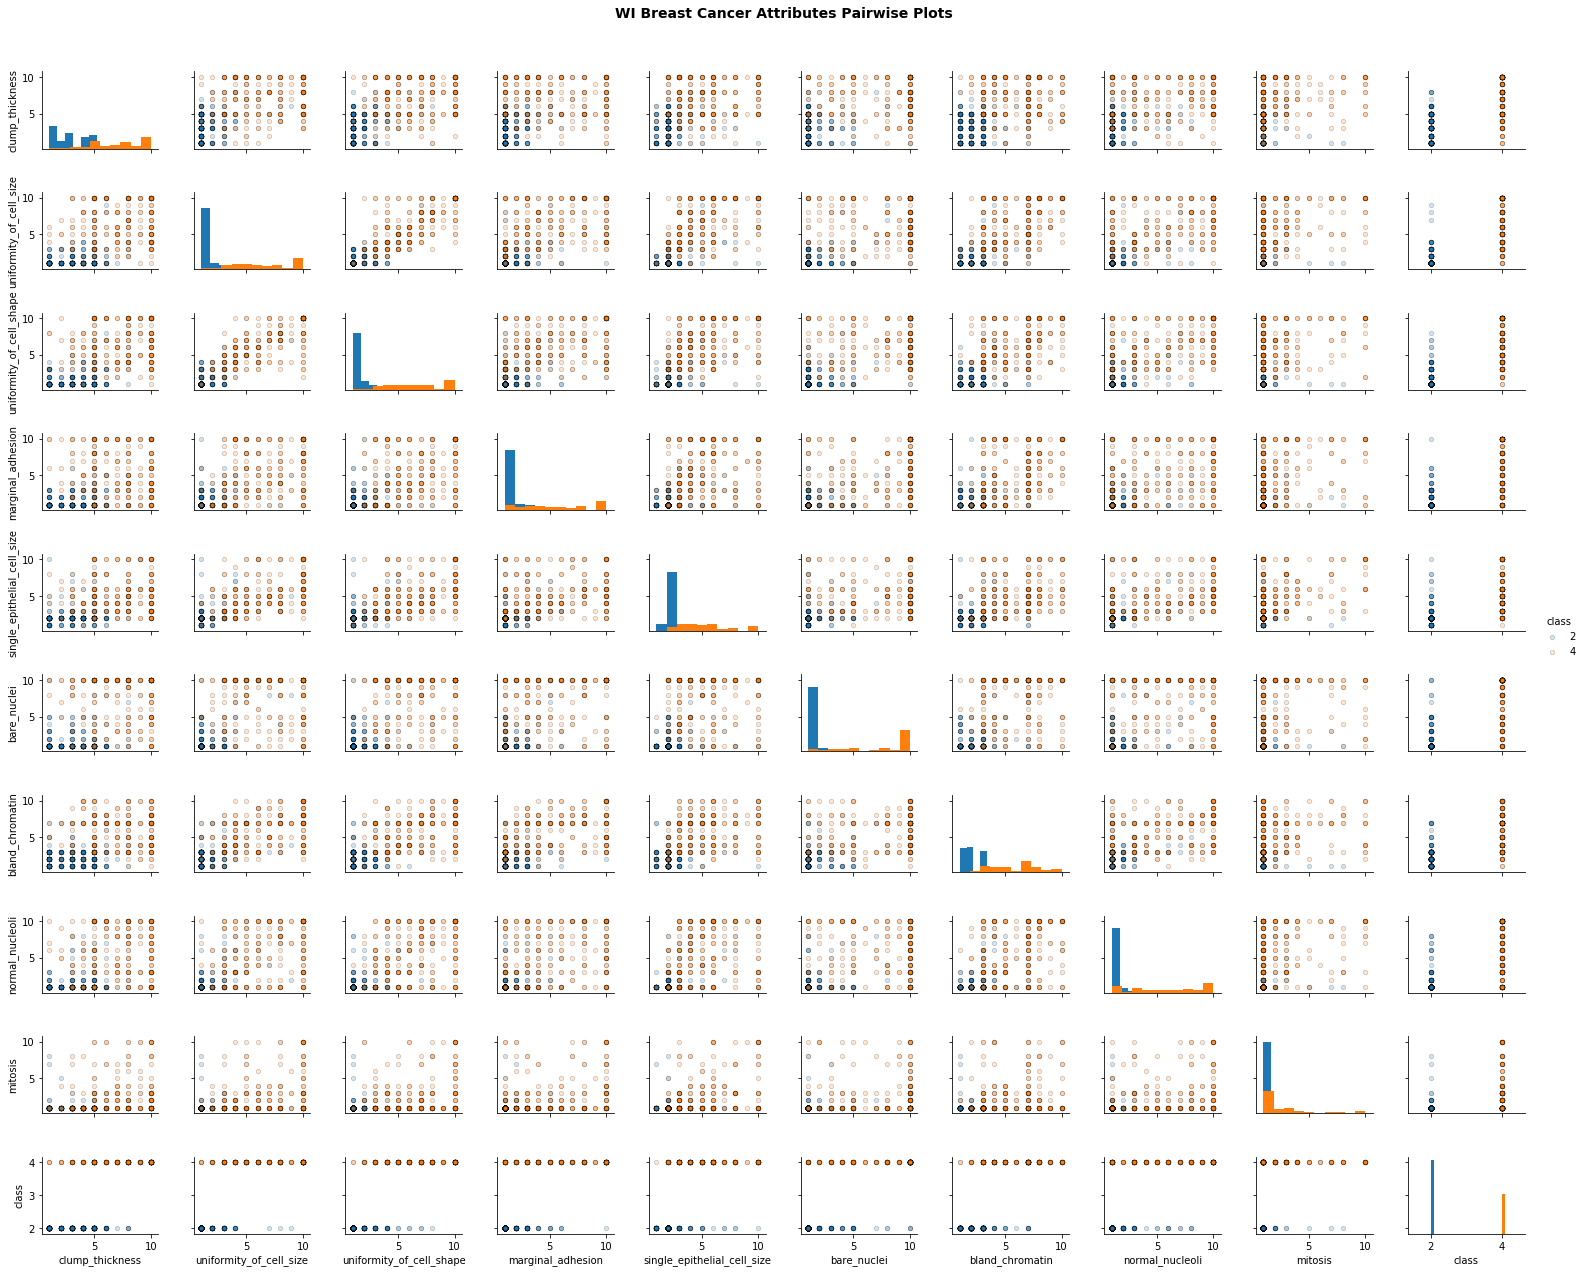

In [21]:
pp = sns.pairplot(df, height=1.8, aspect=1.2, hue='class', diag_kind='hist',
                  plot_kws = {'alpha': 0.2, 's': 20, 'edgecolor': 'k'})

fig = pp.fig 
fig.subplots_adjust(top=0.93, wspace=0.3)
fig.suptitle('WI Breast Cancer Attributes Pairwise Plots', fontsize=14, fontweight='bold')
plt.savefig(dataset_name + '_pairplot_hist.png') 
plt.show()